In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import pathlib
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt



from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Asigna ruta de carpeta con los archivos del corpus

In [2]:
route_images = "C:\\Users\\josek\\Documents\\gitMCC\\MCC-2023-1AD\\AffectiveComputingAI\\training"

data_directory = pathlib.Path(route_images)

Explora la lista de archivos en el directorio del CORPUS

In [3]:
image_count = len(list(data_directory.glob('*/*.jpeg')))
print (image_count)
print (list(data_directory.glob('*/*.jpeg')))

5056
[WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/100.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/101.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/102.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/103.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/104.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/105.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/106.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/107.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/108.jpeg'), WindowsPath('C:/Users/josek/Documents/gi

Agrega uno por uno los grupos de archivos por su clasificacion en el directorio al formato PIL

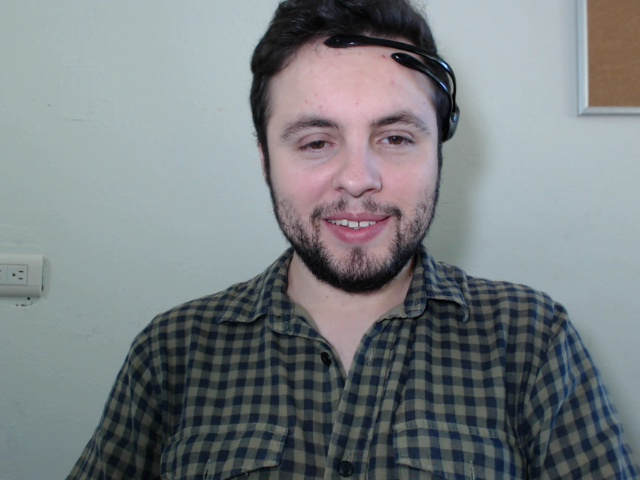

In [4]:
bored_list = list(data_directory.glob('bored/*'))
PIL.Image.open(str(bored_list[0]))
engaged_list = list(data_directory.glob('engaged/*'))
PIL.Image.open(str(engaged_list[0]))
excited_list = list(data_directory.glob('excited/*'))
PIL.Image.open(str(excited_list[0]))
focused_list = list(data_directory.glob('focused/*'))
PIL.Image.open(str(focused_list[0]))
interested_list = list(data_directory.glob('interested/*'))
PIL.Image.open(str(interested_list[0]))
relaxed_list = list(data_directory.glob('relaxed/*'))
PIL.Image.open(str(relaxed_list[0]))

Preprocesamiento de las imagenes ()

In [5]:

def process_image(image_path, label, directory):
    try:
        # Cargar la imagen
        image = face_recognition.load_image_file(image_path)
        
        # Redimensionar la imagen a 150x150
        resized_image = np.array(Image.fromarray(image).resize((150, 150)))
        
        # Detectar puntos de referencia faciales y ubicaciones
        face_landmarks_list = face_recognition.face_landmarks(resized_image)
        face_locations = face_recognition.face_locations(resized_image)

        # Recortar la imagen según las ubicaciones de las caras
        cropped_images = []
        for location in face_locations:
            top, right, bottom, left = location
            cropped_image = resized_image[top:bottom, left:right]
            cropped_images.append(cropped_image)

        # Añadir información al directorio
        directory['face_landmarks'].append(face_landmarks_list)
        directory['face_closeup'].append(cropped_images)
        directory['label'].append(label)
        directory['image'].append(resized_image)
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")

# Directory para almacenar la información procesada
directory = {'image': [], 'face_landmarks': [], 'face_closeup': [], 'label': []}

# Listas de imágenes y sus respectivas etiquetas
image_lists = [bored_list, engaged_list, excited_list, focused_list, interested_list, relaxed_list]
labels = ['bored', 'engaged', 'excited', 'focused', 'interested', 'relaxed']

# Procesamiento de imágenes
for image_list, label in zip(image_lists, labels):
    for image_path in image_list:
        process_image(image_path, label, directory)

# Crear un DataFrame con la información procesada
df = pd.DataFrame(directory)

In [6]:
df.head()

,image,face_landmarks,face_closeup,label
0,"[[[165, 165, 162], [165, 166, 161], [165, 166,...","[{'chin': [(62, 83), (62, 88), (62, 92), (63, ...","[[[[160 162 161], [160 162 161], [160 162 161]...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[{'chin': [(62, 83), (62, 87), (63, 92), (63, ...","[[[[160 162 160], [161 162 161], [160 161 160]...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[{'chin': [(63, 82), (63, 87), (63, 91), (63, ...","[[[[159 161 158], [160 162 159], [161 162 160]...",bored
3,"[[[165, 166, 162], [165, 165, 163], [165, 165,...","[{'chin': [(63, 83), (63, 87), (63, 92), (63, ...","[[[[159 161 158], [161 163 160], [155 157 154]...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[{'chin': [(63, 82), (63, 87), (63, 91), (63, ...","[[[[160 162 159], [161 163 161], [152 154 151]...",bored


Aplanado los datos de face landmarks

In [6]:
def flat_face_landmarks(face_landmarks_list):
    
    landmarks_array = []
    for face_landmarks in face_landmarks_list:
        landmarks = []
        for facial_feature in face_landmarks.keys():
            landmarks.extend(face_landmarks[facial_feature])
        landmarks_array.append(landmarks)
    return np.array(landmarks_array)

# Sobrescribir la columna 
df['face_landmarks'] = df['face_landmarks'].apply(flat_face_landmarks)

Exploracion de datos procesados

In [7]:
df.head()

,image,face_landmarks,face_closeup,label
0,"[[[165, 165, 162], [165, 166, 161], [165, 166,...","[[[62, 83], [62, 88], [62, 92], [63, 97], [64,...","[[[[160 162 161], [160 162 161], [160 162 161]...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[62, 83], [62, 87], [63, 92], [63, 97], [64,...","[[[[160 162 160], [161 162 161], [160 161 160]...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[63, 82], [63, 87], [63, 91], [63, 96], [65,...","[[[[159 161 158], [160 162 159], [161 162 160]...",bored
3,"[[[165, 166, 162], [165, 165, 163], [165, 165,...","[[[63, 83], [63, 87], [63, 92], [63, 97], [64,...","[[[[159 161 158], [161 163 160], [155 157 154]...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[63, 82], [63, 87], [63, 91], [63, 96], [65,...","[[[[160 162 159], [161 163 161], [152 154 151]...",bored


Guardado de archivos procesados

In [8]:
# Guardar el DataFrame en archivos persistentes
df.to_pickle('affective_dataset.pkl')
df.to_csv('affective_dataset.csv')